# 🧮 Solving a Second-Order ODE using the Verlet Method

This notebook demonstrates how to numerically solve a second-order ordinary differential equation (ODE) using the **Verlet method**, a simple and efficient finite difference scheme of second-order accuracy.

---

## 📘 The Equation

We want to solve the ODE:

$
\frac{d^2 f}{dx^2} = f \left( -\frac{1}{\sigma^2} + \frac{x^2}{\sigma^4} \right)
$

This equation appears in physics contexts like the 1D quantum harmonic oscillator (without the energy eigenvalue term), and it admits Gaussian-like or Hermite-function solutions.

We rewrite the right-hand side as:

$
a(f, x) = f \left( -\frac{1}{\sigma^2} + \frac{x^2}{\sigma^4} \right)
$

---

## 🧩 Discretization with the Verlet Scheme

To solve the equation numerically, we discretize the second derivative using the **Verlet (central difference) method**:

$
f_{i} = 2f_{i-1} - f_{i-2} + h^2 \cdot a(f_{i-1}, x_{i-1})
$

This explicit update rule propagates the solution forward (or backward) starting from two initial values.

```python
def a(sigma, f, x):
    return -f / (sigma**2) + (x**2 / sigma**4) * f

def soleq(n1, n2, sigma):
    j = np.sign(n2 - n1)  # direction of propagation (+1 or -1)
    f = np.array(x)       # initialize with a copy of x, will hold f(x)
    f[n1] = 0             # initial condition: f = 0 at first point
    f[n1 + j] = 1e-6      # small nonzero value to bootstrap the recursion

    for i in range(n1 + 2 * j, n2 + j, j):
        f[i] = (2 * f[i - j] - f[i - 2 * j] +
                h**2 * a(sigma, f[i - j], x[i - j]))
    return f


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the source term in the second-order differential equation
# This corresponds to: a(f, x) = f * (-1/σ² + x²/σ⁴)
def a(sigma, f, x):
    return -f / (sigma**2) + (x**2 / sigma**4) * f

In [3]:
# Function to solve the differential equation using a finite difference method
# Similar in structure to the Numerov method (second-order accurate)
def soleq(n1, n2, sigma):
    j = np.sign(n2 - n1)  # Direction of integration (+1 or -1)

    # Initialize the solution array f as a copy of x
    f = np.array(x)

    # Set initial conditions for the recursive method
    f[n1] = 0               # First point
    f[n1 + j] = 1e-6        # Small non-zero second point to start recurrence

    # Recursive computation using finite difference method
    # f(i) = 2*f(i-j) - f(i-2j) + h² * a(f, x)
    for i in range(n1 + 2 * j, n2 + j, j):
        f[i] = (2 * f[i - j] - f[i - 2 * j] +
                h * h * a(sigma, f[i - j], x[i - j]))

    return f


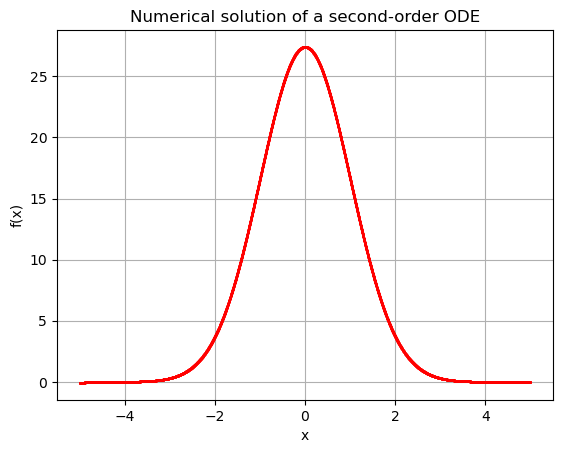

In [4]:
n = 10000                          # Number of grid points
x = np.linspace(-5., 5., n)       # Create x values from -5 to +5
h = x[1] - x[0]                   # Step size

# Solve the differential equation from right (9999) to left (0)
# with sigma = 1
f = soleq(9999, 0, sigma=1)

# Plot the resulting function f(x)
plt.plot(x, f, 'r.', markersize=1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Numerical solution of a second-order ODE")
plt.grid(True)
plt.show()